# Imports and Pathnames

In [7]:
# Import standard packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Import Random Forest Regressor
import torch 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Establish data import paths
data_path = [
    '/Users/kyhi2018/Desktop/IndividualProject/Pre-processed ML data/Term 1/Main Library Pre-processed.xlsx', # Main Library (Term 1)
    '/Users/kyhi2018/Desktop/IndividualProject/Pre-processed ML data/Term 1/Student Centre Pre-processed.xlsx', # Student Centre (Term 1)
    '/Users/kyhi2018/Desktop/IndividualProject/Pre-processed ML data/Term 1/Science Library Pre-processed.xlsx', # Science Library (Term 1)
    '/Users/kyhi2018/Desktop/IndividualProject/Pre-processed ML data/Term 2/Main Library Pre-processed.xlsx', # Main Library (Term 2)
    '/Users/kyhi2018/Desktop/IndividualProject/Pre-processed ML data/Term 2/Student Centre Pre-processed.xlsx', # Student Centre (Term 2)
    '/Users/kyhi2018/Desktop/IndividualProject/Pre-processed ML data/Term 2/Science Library Pre-processed.xlsx', # Science Library (Term 2)
    ]

# Pre-Training Functions

In [8]:
# Split data into training and testing sets
def train_test_split(data, train_end):
    # Select training and test periods
    train_end = datetime(2022,train_end[0],train_end[1]) # change date to end of training period
    test_start = train_end + timedelta(days=1) # test period is 1 day after train period ends

    # Split data into training and testing sets
    x_train = data.set_index('Occurrence Time')[:train_end.date()].iloc[:,1:-2]
    x_test = data.set_index('Occurrence Time')[test_start.date():].iloc[:,1:-2]
    y_train = data.set_index('Occurrence Time')[:train_end.date()].iloc[:,0]
    y_test = data.set_index('Occurrence Time')[test_start.date():].iloc[:,0]
    
    # Convert to tensors
    x_train = torch.tensor(x_train.values).float()
    x_test = torch.tensor(x_test.values).float()
    y_train = torch.tensor(y_train.values).float()
    y_test = torch.tensor(y_test.values).float()
    
    return x_train, x_test, y_train, y_test

# Create training and testing sets (spedfic to term 1 and term 2)
def t1_train_t2_test(t1_data, t2_data):
    # Split data into training and testing sets
    x_train = t1_data.iloc[:,2:-2]
    x_test = t2_data.iloc[:,2:-2]
    y_train = t1_data.iloc[:,1]
    y_test = t2_data.iloc[:,1]

    # Convert to tensors
    x_train = torch.tensor(x_train.values).float()
    x_test = torch.tensor(x_test.values).float()
    y_train = torch.tensor(y_train.values).float()
    y_test = torch.tensor(y_test.values).float()
    
    return x_train, x_test, y_train, y_test

# Main

In [31]:
if __name__ == '__main__':
    # Import data
    t1_data = pd.read_excel(data_path[0])
    t2_data = pd.read_excel(data_path[3])
    
    # Split data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(t1_data, (11, 11))
    #x_train, x_test, y_train, y_test = t1_train_t2_test(t1_data, t2_data)
    
    # Train Random Forest Regressor
    RF_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
    RF_model.fit(x_train, y_train)
    predictions = RF_model.predict(x_test)
    
    # Calculate MSE loss
    mse = mean_squared_error(y_test, predictions)
    print('MSE Loss: ', mse)

MSE Loss:  3855.859016270272


# Plotting Results

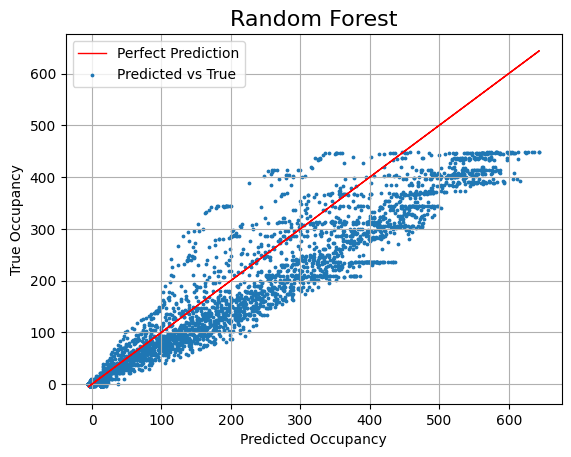

In [32]:
# For comparison, plot line of perfect prediction
plt.plot(y_test, y_test, color='red', linewidth=1) 

# Plot predicted vs actual occupancy
plt.scatter(y_test, predictions, s=3)

# Plot formatting
plt.title('Random Forest', fontsize=16)
plt.xlabel('Predicted Occupancy')
plt.ylabel('True Occupancy')
plt.legend(['Perfect Prediction', 'Predicted vs True'])
plt.grid()
plt.show()